In [1]:
print('Hello, world!')


Hello, world!


In [2]:
import numpy as np 

### Numpy : 선형대수연산 및 푸리에 변환 수학적 함수 
### Scipy : 과학계산용 함수


In [3]:
x = np.array([[1,2,3],[4,5,6]])
print(x)

[[1 2 3]
 [4 5 6]]


In [4]:
from scipy import sparse 

#### 대각선 원소가 1이고 나머지는 0인 2차원 Numpy배열을 불러냄


In [5]:
eye = np.eye(4)
print("Numpy 배열 :\n",eye)

Numpy 배열 :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
sparse_matrix = sparse.csr_matrix(eye)
print("\nScipy의 CSR 행렬 : \n",sparse_matrix)


Scipy의 CSR 행렬 : 
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### CSR : Compressed Sparse Row Matrix 
##### 행의 인덱스를 압축하여 저장함

In [7]:
sparse_matrix.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

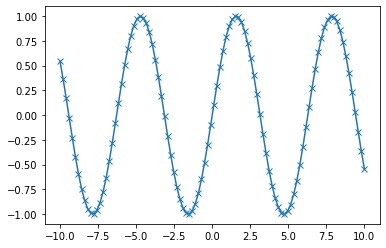

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 

x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker="x")

##### matplotlin inline -> 브라우저에서 바로 이미지 볼수 있도록 함

#### linspace(-10,10,100) - > -10 ~ 10 까지 100개의 간격으로 나누어진 배열을생성 

#### plt plot(x,y,marker="x")  ->x의 간격으로 y모양의 선그래프를 생성함

In [9]:
import pandas as pd  
data = {'Name': ["Jone","anna","Peter","Linda"],
       'Location':["NY","Paris","Berlin","London"],
       'Age' : [24,13,53,33]}

data_pandas = pd.DataFrame(data) 
display(data_pandas)

,Name,Location,Age
0,Jone,NY,24
1,anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


##### 데이터 베이스 생성 및 display로 출력

#### Pandas : 데이터처리와 분석용 라이브러리  각 열이 다른 타입 저장가능
#### NumPy : 전체 배열의 원소가 동일한 타입

In [10]:
display(data_pandas[data_pandas.Age>30]) 

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


#### 조건을 이용하여 일부만 출력

# Python 버전 확인

In [11]:
import sys
print("Python version",sys.version)

Python version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [12]:
print("pandas version",pd.__version__)

pandas version 0.25.1


In [13]:
import matplotlib 
print("matplotlib version",matplotlib.__version__)

matplotlib version 3.1.1


In [14]:
print("Numpy version",np.__version__)

Numpy version 1.19.5


In [15]:
import scipy as sp
print("Scipy version",sp.__version__)

Scipy version 1.3.1


In [16]:
import IPython 
print("IPython version", IPython.__version__)


IPython version 7.8.0


In [17]:
import sklearn 
print("scikit-learn version",sklearn.__version__)

scikit-learn version 0.21.3


# KNN 실습

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 

from sklearn.datasets import load_iris 
iris_dataset = load_iris() 
print("iris_dataset의 키:{}".format(iris_dataset.keys()))

iris_dataset의 키:dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


- numpy : 수학적 함수를 지원
- matplotlib.pyplot : 데이터를 시각화 시켜주는 함수를 지원
- pandas : 데이터 처리와 분석을 해주는 함수를 지원
- mglearn : 머신러닝 라이브러리 
- load_iris : 함수를 이용하여 dataset을 만듬

In [19]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [20]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
print("타깃의 이름: {}".format(iris_dataset['target_names'])) 

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [22]:
print("타깃의 특징: {}".format(iris_dataset['feature_names']))

타깃의 특징: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [23]:
print("타깃: {}".format(iris_dataset['target']))

타깃: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [24]:
print("데이터: {}".format(iris_dataset['data']))

데이터: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3

In [25]:
print("데이터: {}".format(iris_dataset['data'][:5]))

데이터: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [26]:
print("데이터의 타입: {}".format(type(iris_dataset['data'])))

데이터의 타입: <class 'numpy.ndarray'>


In [27]:
print("데이터의 크기: {}".format(iris_dataset['data'].shape)) 

데이터의 크기: (150, 4)


In [28]:
from sklearn.model_selection import train_test_split 

X_train ,X_test ,y_train ,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],test_size=0.33,random_state=42)

- train_test_split을 이용하여 trian,test를 나눠주는 역할함

- Random_state : 무작위에 같은 seed를 주어 실험때마다 다른 값이 되는 것을 방지, 0, 21, 42는 중요하지 않음

In [29]:
print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))

X_train 크기 : (100, 4)
y_train 크기 : (100,)


In [30]:
print("X_test 크기 : {}".format(X_test.shape))
print("y_test 크기 : {}".format(y_test.shape))

X_test 크기 : (50, 4)
y_test 크기 : (50,)


## train : Test = 66.6% : 33.3% 로 나눔

In [31]:
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)



- x_train 데이터를 사용하여 데이터프레임만들고 , 열의 이름을 iris_dataset.feature_names에 있는 문자열을 사용함

### #s:marker의 크기
### #cmap: color map 
### #alpha: amount of transparency applied
### 대각선: 각 특성의 히스토그램


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb501dee590>,
      dtype=object)

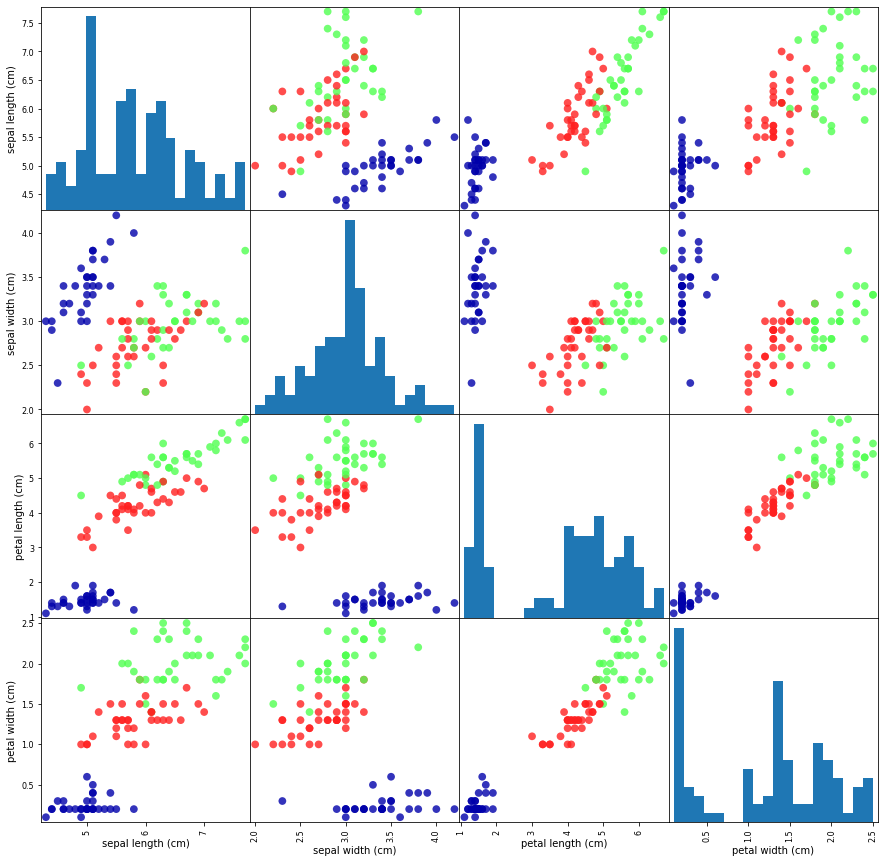

In [32]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),marker='o',
                           hist_kwds={'bins':20},s=60, alpha=.8, cmap=mglearn.cm3)



- 데이터프레임을 사용해 y_trai에 따라 색으로 구분된 산점도 행렬을 만듬

# K-NN 최근접 알고리즘

In [33]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

- Knn 분류기 불러오기
- n_neighbors = 1 이웃의 수를 1로 지정함 
- knn.fit() 훈련데이터를 학습시켜줌

In [34]:
X_new = np.array([[5,2.9,1,0.2]])
print('X_new.shape:',X_new.shape)

X_new.shape: (1, 4)


- 새로운 데이터 분류작업

In [35]:
prediction = knn.predict(X_new)
print("예측:",prediction)
print("예측한 타깃의 이름:",iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [36]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n",y_pred) 

테스트 세트에 대한 예측값:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


### 정확도를 나타내는 두가지 방법


In [37]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))

테스트 세트의 정확도: 0.98


In [38]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.98


# 지도학습

In [39]:
from preamble import*
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

### preamble.py : 출력을 위해 만든 파일 

In [40]:
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="")

#### 샘플데이터 만들기 


In [41]:
X,y = mglearn.datasets.make_forge()

#### 산점도 그리기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


X.shape:  (26, 2)


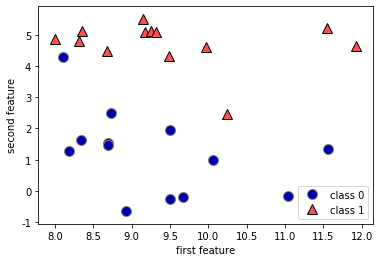

In [42]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1",],loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape: ",X.shape)

In [43]:
print(X,'\n')

[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] 



In [44]:
print(type(X))

<class 'numpy.ndarray'>


In [45]:
print(X,'\n',type(X),'\n',X.shape)

[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] 
 <class 'numpy.ndarray'> 
 (26, 2)


In [46]:
print(y,'\n',type(y),'\n',y.shape)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0] 
 <class 'numpy.ndarray'> 
 (26,)


Text(0, 0.5, 'target')

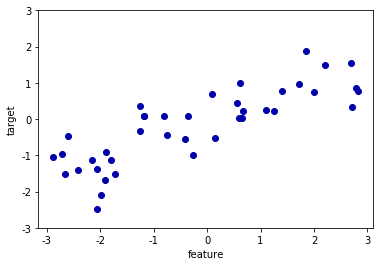

In [47]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [48]:
print(X,'\n',type(X),'\n',X.shape)
print(y,'\n',type(X),'\n',y.shape)

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]
 [-2.876]
 [ 2.819]
 [ 1.995]
 [-1.726]
 [-1.909]
 [-1.9  ]
 [-1.175]
 [ 0.149]
 [-0.408]
 [-1.253]
 [ 0.671]
 [-2.163]
 [-1.247]
 [-0.802]
 [-0.264]
 [ 1.711]
 [-1.802]
 [ 0.085]
 [ 0.554]
 [-2.721]
 [ 0.645]
 [-1.977]
 [-2.61 ]
 [ 2.693]
 [ 2.794]
 [ 1.85 ]
 [-1.172]
 [-2.414]
 [ 1.105]
 [-0.359]] 
 <class 'numpy.ndarray'> 
 (40, 1)
[-0.448  0.331  0.779  0.035 -1.388 -2.472 -1.527  1.494  1.     0.23
 -1.06   0.779  0.754 -1.514 -1.673 -0.905  0.084 -0.527 -0.541 -0.341
  0.218 -1.125  0.373  0.098 -0.986  0.967 -1.135  0.698  0.437 -0.957
  0.035 -2.086 -0.474  1.537  0.869  1.877  0.095 -1.415  0.254  0.094] 
 <class 'numpy.ndarray'> 
 (40,)


# Wisconsin Breast Cancer Data

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n",cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [50]:
print("데이터의 형태: ", cancer.data.shape)

데이터의 형태:  (569, 30)


In [51]:
print("클래스별 샘플 갯수:\n",{n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [52]:
print("특성 이름: \n", cancer.feature_names)

특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [53]:
print("cancer.data: \n{}".format(cancer.data))

cancer.data: 
[[ 17.99   10.38  122.8   ...   0.265   0.46    0.119]
 [ 20.57   17.77  132.9   ...   0.186   0.275   0.089]
 [ 19.69   21.25  130.    ...   0.243   0.361   0.088]
 ...
 [ 16.6    28.08  108.3   ...   0.142   0.222   0.078]
 [ 20.6    29.33  140.1   ...   0.265   0.409   0.124]
 [  7.76   24.54   47.92  ...   0.      0.287   0.07 ]]


In [54]:
print("cancer.target: \n{}".format(cancer.target))

cancer.target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 

# 보스턴 주택가격

In [55]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: ", boston.data.shape)
print("boston.keys(): \n",boston.keys())
print("특성 이름: \n", boston.feature_names)
print("cancer.target: \n{}".format(boston.target))

데이터의 형태:  (506, 13)
boston.keys(): 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
특성 이름: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
cancer.target: 
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 1

In [56]:
# 데이터로드
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()


In [57]:
print("X.shape: {}".format(X.shape), "y.shape:{}".format(y.shape))

X.shape: (26, 2) y.shape:(26,)


In [58]:
#훈련, 테스트 분할하는 역할
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


In [59]:
print("X_train.shape: {}".format(X_train.shape), "X_test.shape:{}".format(X_test.shape))

X_train.shape: (19, 2) X_test.shape:(7, 2)


In [60]:
#모델 선택 
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [61]:
# 학습하기
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [62]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [63]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


##### 라이브러리에 대해서 한번 더 되새김 할수있었고 추가로 KNN k값을 수정하여 테스트 시켰을때 정확도의 값은 변화안되었지만 훈련데이터, 테스트 데이터 들의 2;1 비율로 나눴을때 정확도의 값이 조금더 증가 하는 것을 볼수 있었습니다. 이번 강의를 통해서 함수를 하나하나 분석하여 이해해보니 조금 더 실력 향상이 되는 느낌을 받았습니다.